In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_test=pd.read_csv(r'D:\dinesh document\EXCELR\Data Science\Assingment\Naive bayes\SalaryData_Test.csv')

In [3]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
salary_train=pd.read_csv(r'D:\dinesh document\EXCELR\Data Science\Assingment\Naive bayes\SalaryData_Train.csv')

In [5]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## EDA

In [6]:
salary_test.shape

(15060, 14)

In [7]:
salary_train.shape

(30161, 14)

In [8]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
#salary_test data information
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [11]:
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

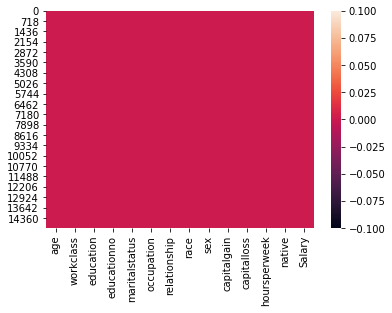

In [12]:
sns.heatmap(salary_test.isna())

#### No missing value in salary_test data.

In [13]:
salary_test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


### Visualization salary_test_data

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'capitalgain'}>],
       [<AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

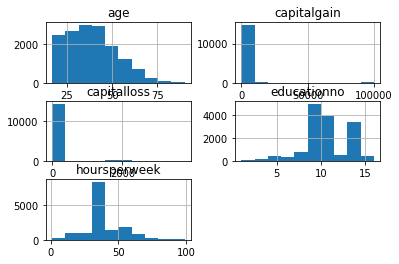

In [14]:
salary_test.hist()

<AxesSubplot:>

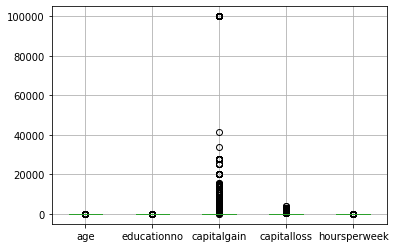

In [15]:
salary_test.boxplot()

In [84]:
salary_test['workclass'].value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='workclass', ylabel='count'>

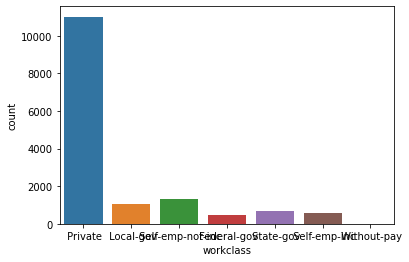

In [16]:
sns.countplot(salary_test['workclass'])

#### Count of private workclass is high

In [85]:
salary_test['education'].value_counts()

 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='education', ylabel='count'>

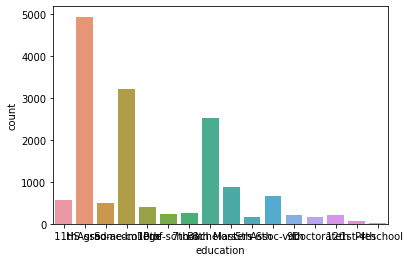

In [17]:
sns.countplot(salary_test['education'])

#### Count of education HS-grad is High

In [86]:
salary_test['maritalstatus'].value_counts()

 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

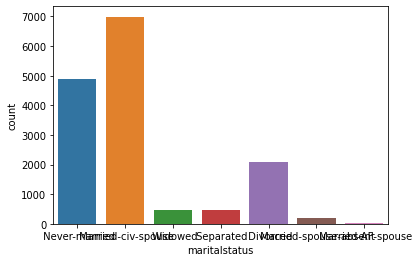

In [18]:
sns.countplot(salary_test['maritalstatus'])

#### count of married civ spouse is high

In [87]:
salary_test['occupation'].value_counts()

 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-service        1596
 Machine-op-inspct    1004
 Transport-moving      744
 Handlers-cleaners     696
 Tech-support          508
 Farming-fishing       491
 Protective-serv       332
 Priv-house-serv        89
 Armed-Forces            5
Name: occupation, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='occupation', ylabel='count'>

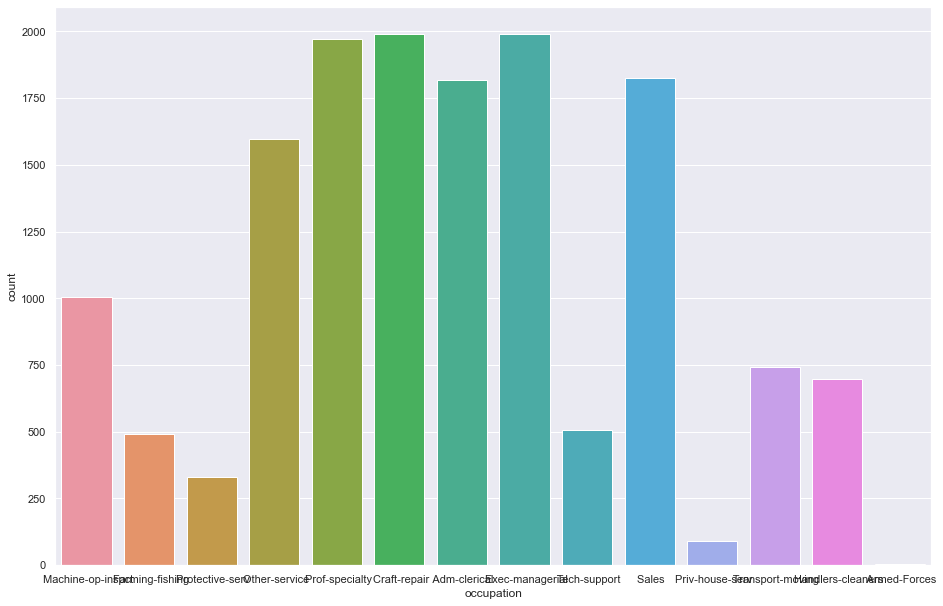

In [19]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.countplot(salary_test['occupation'])

#### count of person with Exec-managerial and Craft-repair is high

In [88]:
salary_test['race'].value_counts()

 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='race', ylabel='count'>

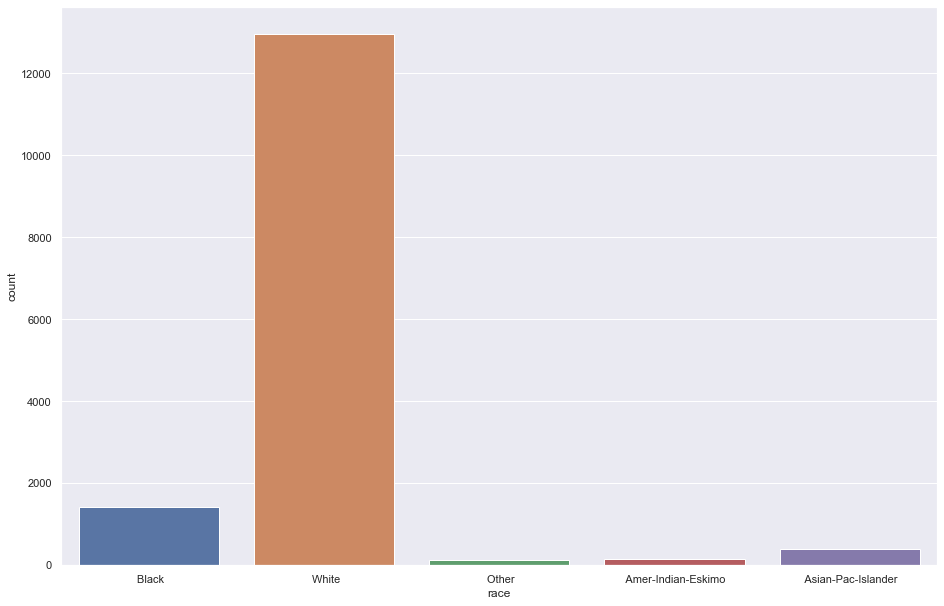

In [20]:
sns.countplot(salary_test['race'])

#### Data count of white race is high

In [89]:
salary_test['sex'].value_counts()

 Male      10147
 Female     4913
Name: sex, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

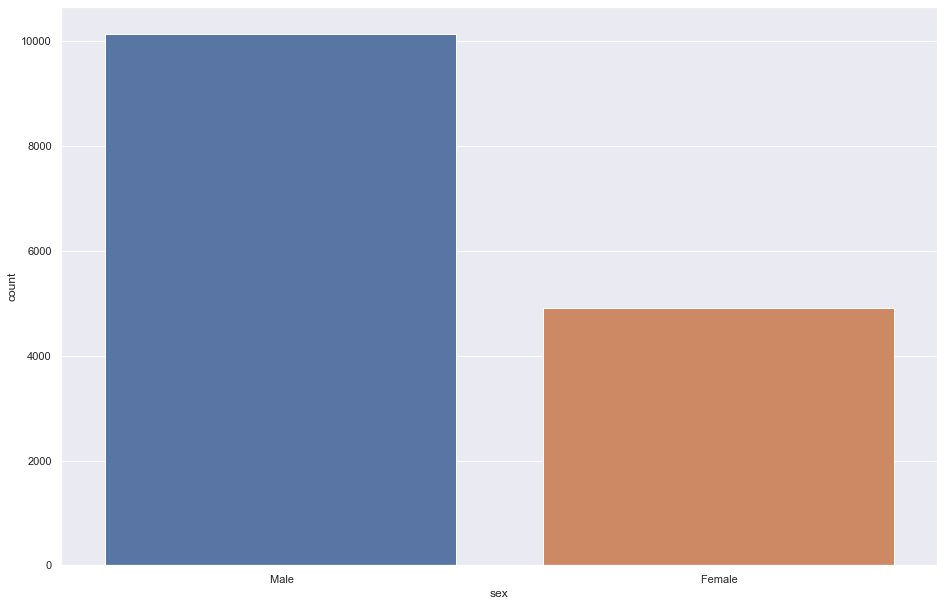

In [21]:
sns.countplot(salary_test['sex'])

#### Data count of male is high

In [90]:
salary_test['native'].value_counts()

 United-States                 13788
 Mexico                          293
 Philippines                      95
 Puerto-Rico                      66
 Germany                          65
 Canada                           56
 El-Salvador                      47
 India                            47
 China                            45
 Cuba                             41
 England                          33
 Italy                            32
 Japan                            30
 Dominican-Republic               30
 South                            30
 Portugal                         28
 Haiti                            27
 Columbia                         26
 Poland                           25
 Jamaica                          23
 Guatemala                        23
 Greece                           20
 Vietnam                          19
 Ecuador                          16
 Nicaragua                        15
 Peru                             15
 Iran                             14
 

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='native', ylabel='count'>

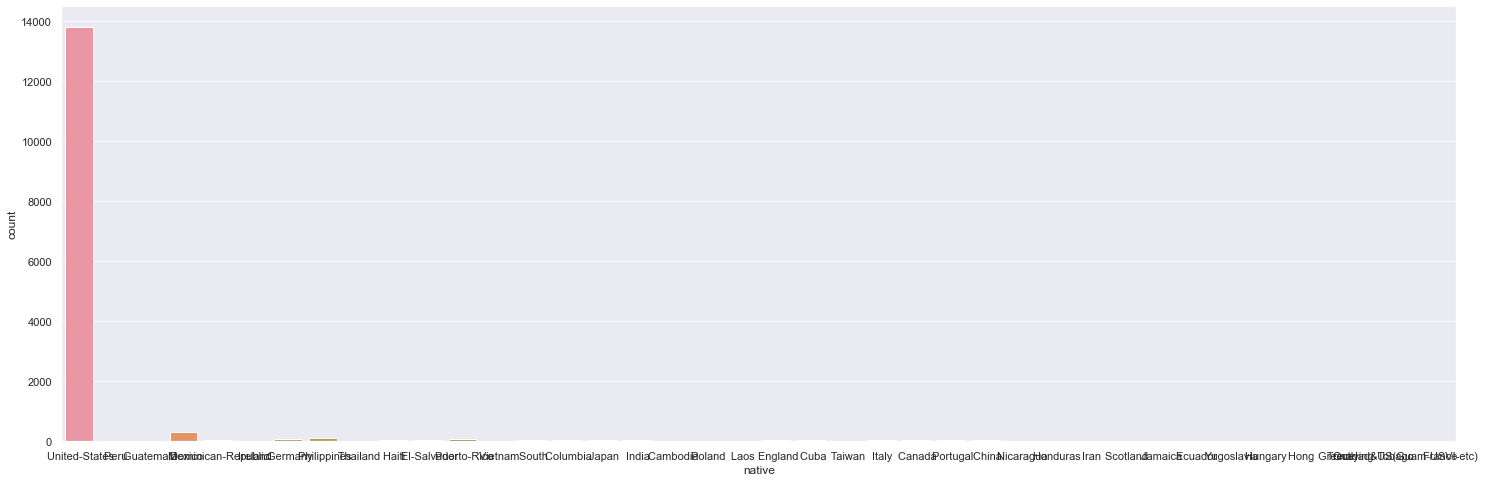

In [22]:
sns.set(rc={'figure.figsize':(25,8)})
sns.countplot(salary_test['native'])

In [99]:
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Salary', ylabel='count'>

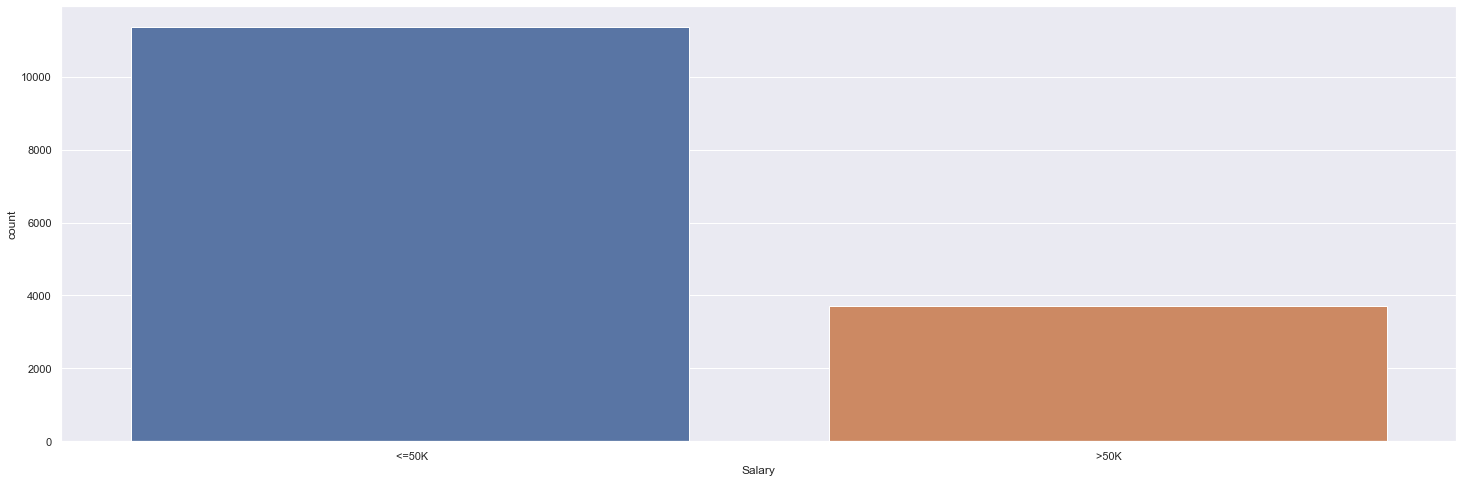

In [100]:
sns.countplot(salary_test['Salary'])

In [104]:
pd.crosstab(salary_test['workclass'],salary_test['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,279,184
Local-gov,727,306
Private,8646,2375
Self-emp-inc,260,312
Self-emp-not-inc,952,345
State-gov,491,176
Without-pay,5,2


In [105]:
pd.crosstab(salary_test['occupation'],salary_test['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,1561,258
Armed-Forces,2,3
Craft-repair,1543,447
Exec-managerial,1062,930
Farming-fishing,434,57
Handlers-cleaners,644,52
Machine-op-inspct,884,120
Other-service,1532,64
Priv-house-serv,87,2


#### Data count of persons from native US is high

In [23]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
# salary_train data information
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [25]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [26]:
salary_train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

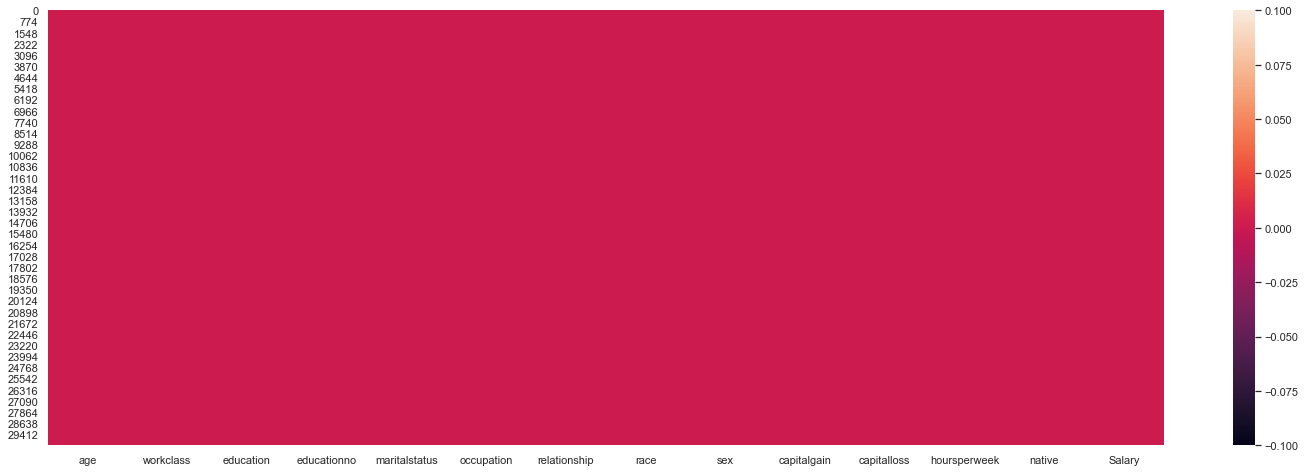

In [27]:
sns.heatmap(salary_train.isna())

#### No missing value in salary_train data

In [28]:
salary_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


### Visualize salary_train_data

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'capitalgain'}>],
       [<AxesSubplot:title={'center':'capitalloss'}>,
        <AxesSubplot:title={'center':'educationno'}>],
       [<AxesSubplot:title={'center':'hoursperweek'}>, <AxesSubplot:>]],
      dtype=object)

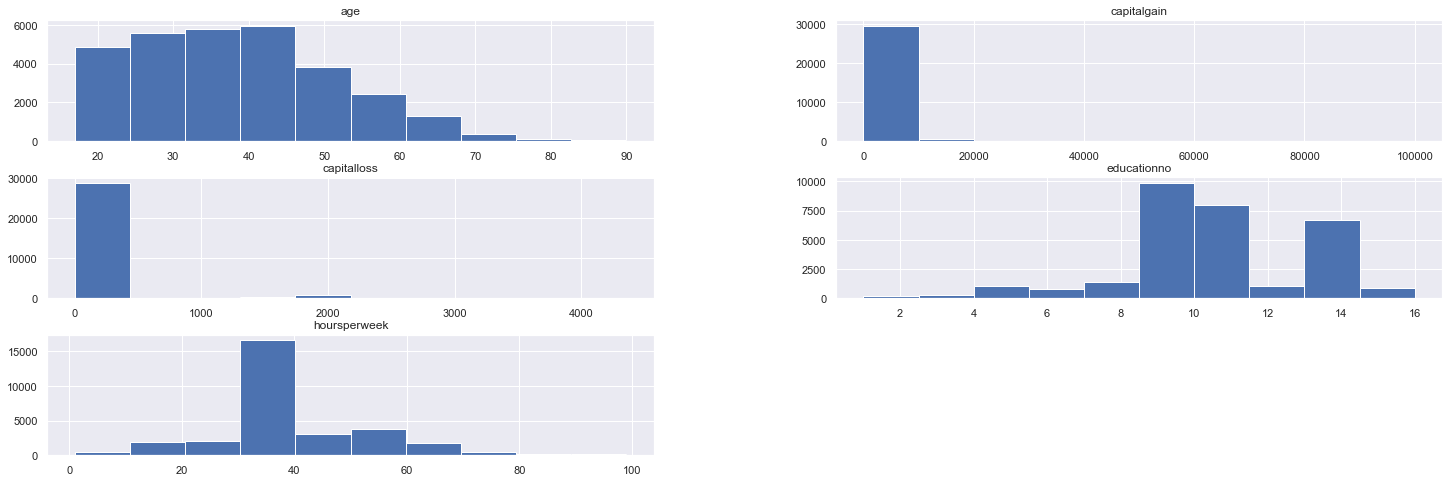

In [29]:
salary_train.hist()

<AxesSubplot:>

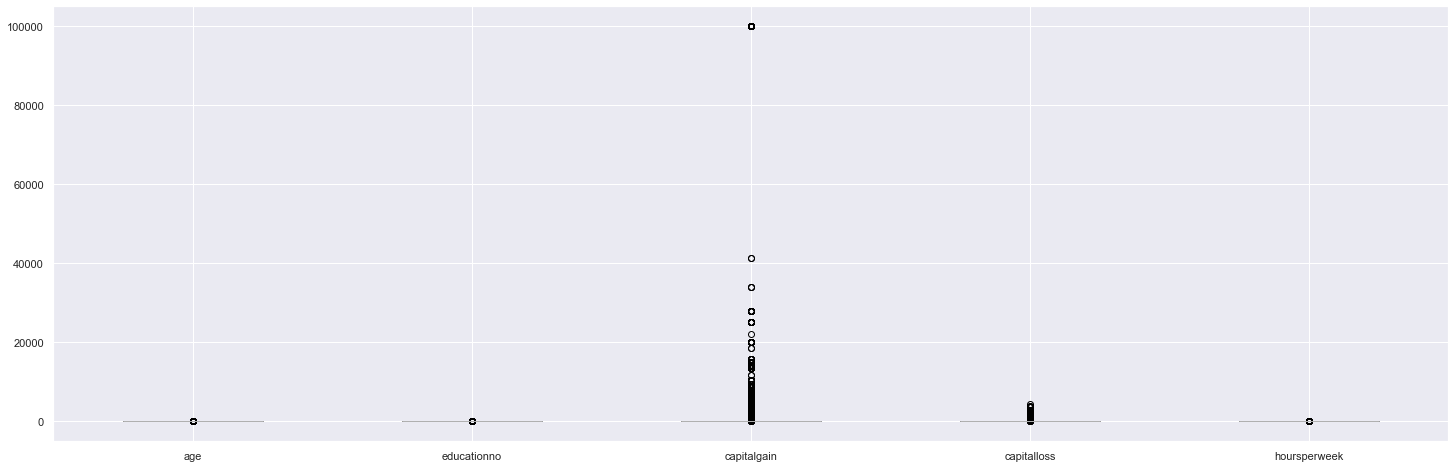

In [30]:
salary_train.boxplot()

In [91]:
salary_train['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='workclass', ylabel='count'>

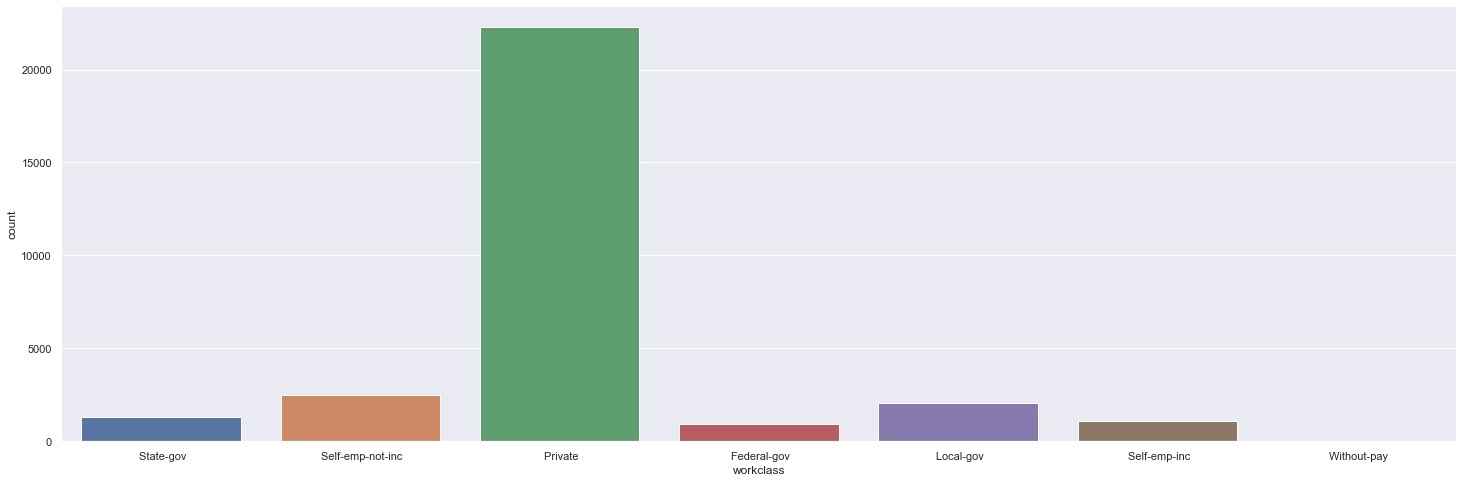

In [31]:
sns.countplot(salary_train['workclass'])

#### Count of Private workclass is high

In [92]:
salary_train['education'].value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='education', ylabel='count'>

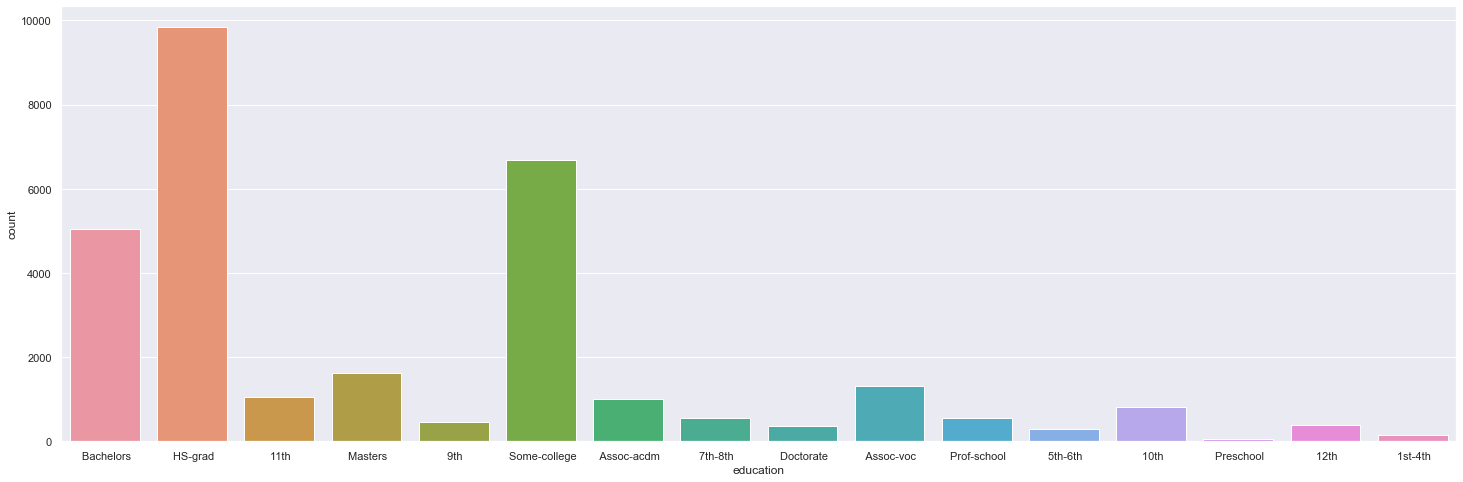

In [32]:
sns.countplot(salary_train['education'])

#### Count of education HS-grad is High

In [93]:
salary_train['maritalstatus'].value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='maritalstatus', ylabel='count'>

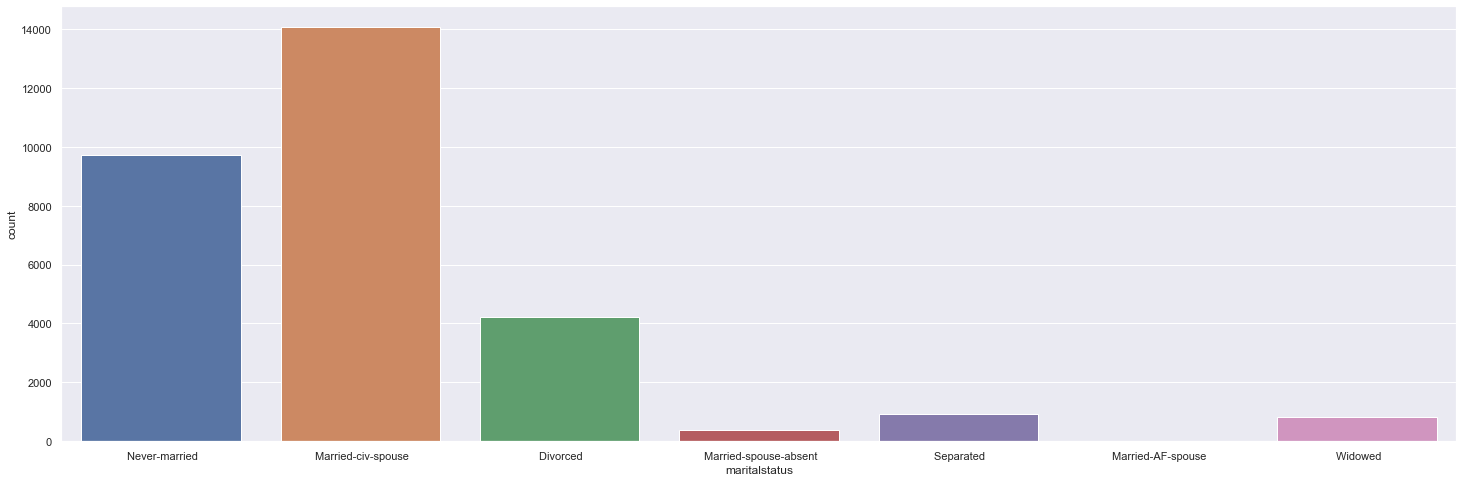

In [33]:
sns.countplot(salary_train['maritalstatus'])

#### count of married civ spouse is high

In [94]:
salary_train['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='occupation', ylabel='count'>

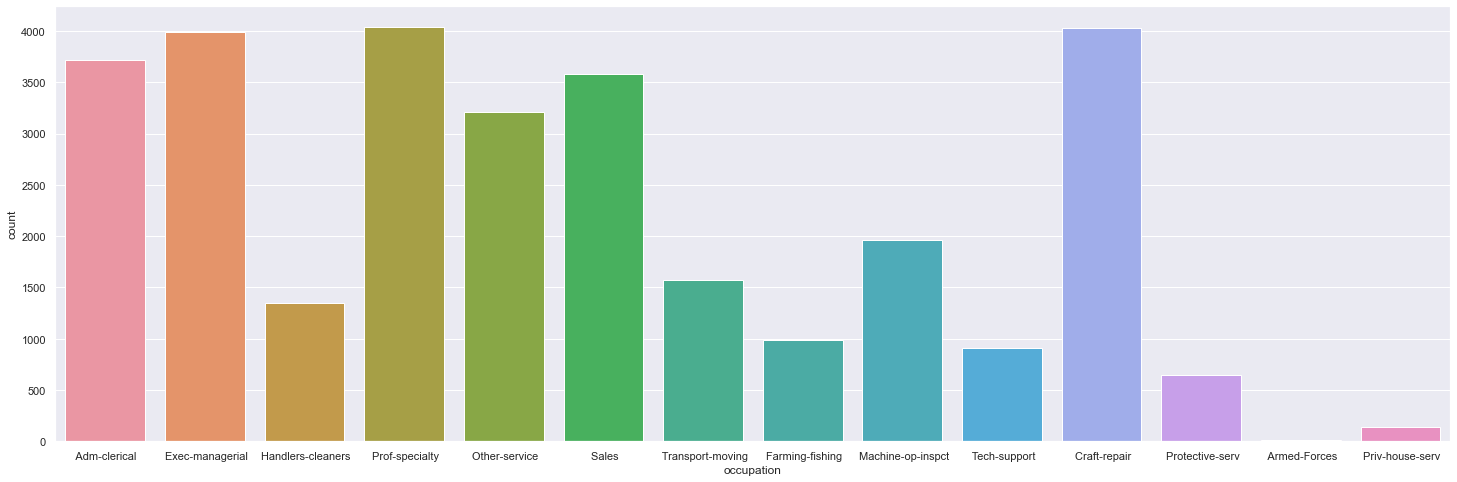

In [34]:
sns.countplot(salary_train['occupation'])

#### count of person with Exec-managerial,Prof-speciality and Craft-repair is high

In [95]:
salary_train['relationship'].value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='relationship', ylabel='count'>

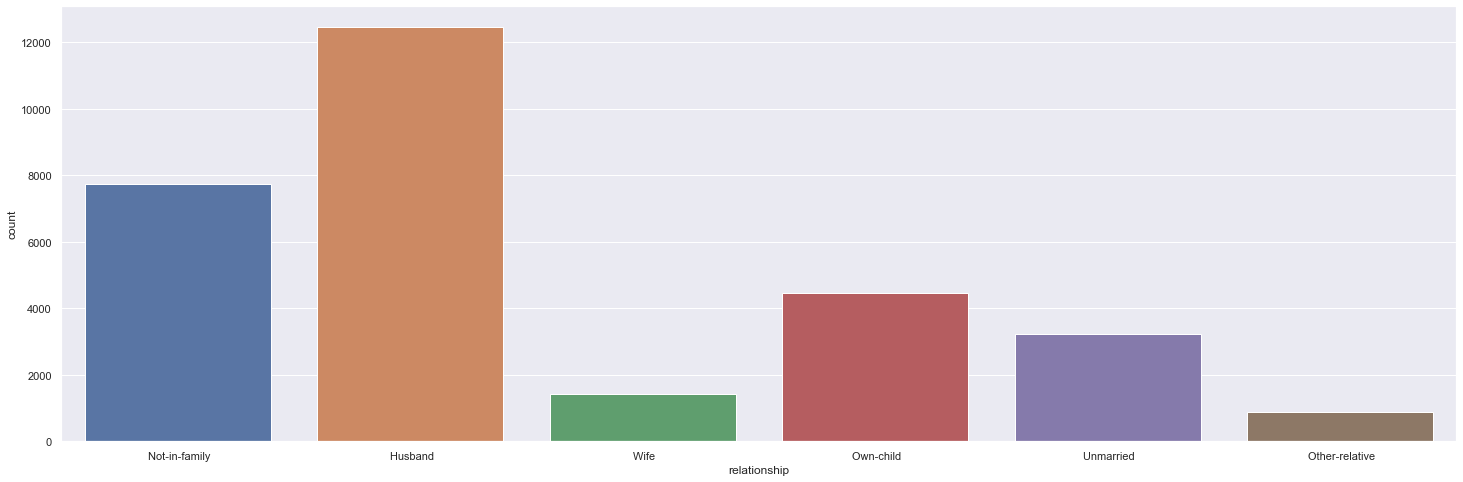

In [35]:
sns.countplot(salary_train['relationship'])

#### Count of Person with relation husband is high

In [96]:
salary_train['race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='race', ylabel='count'>

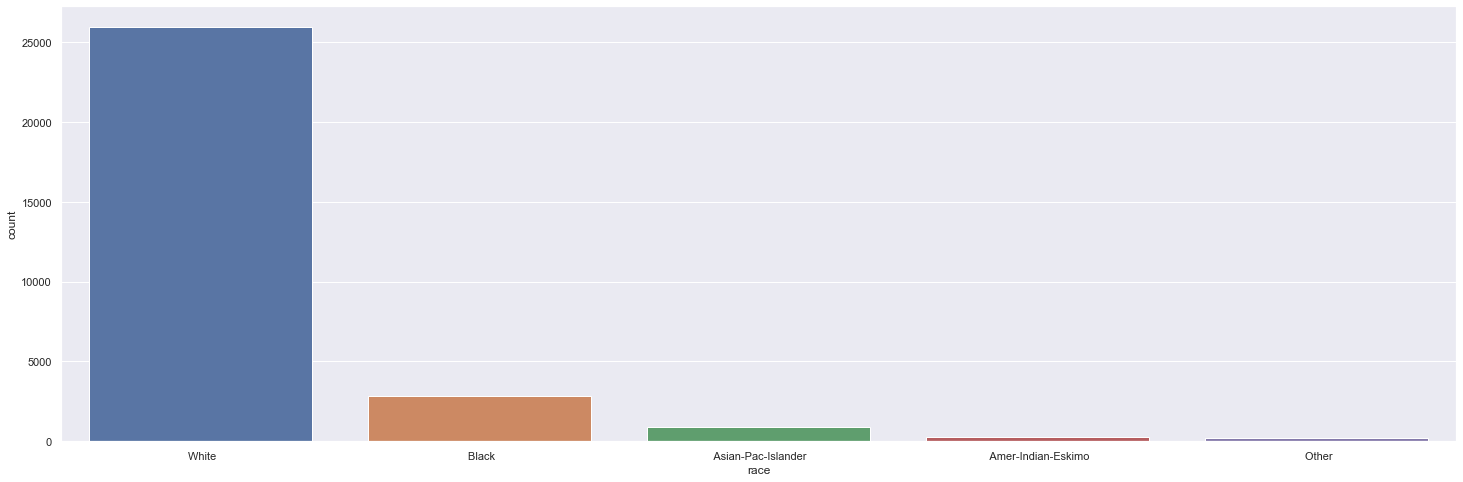

In [36]:
sns.countplot(salary_train['race'])

#### Data count of white race is high

In [97]:
salary_train['sex'].value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='count'>

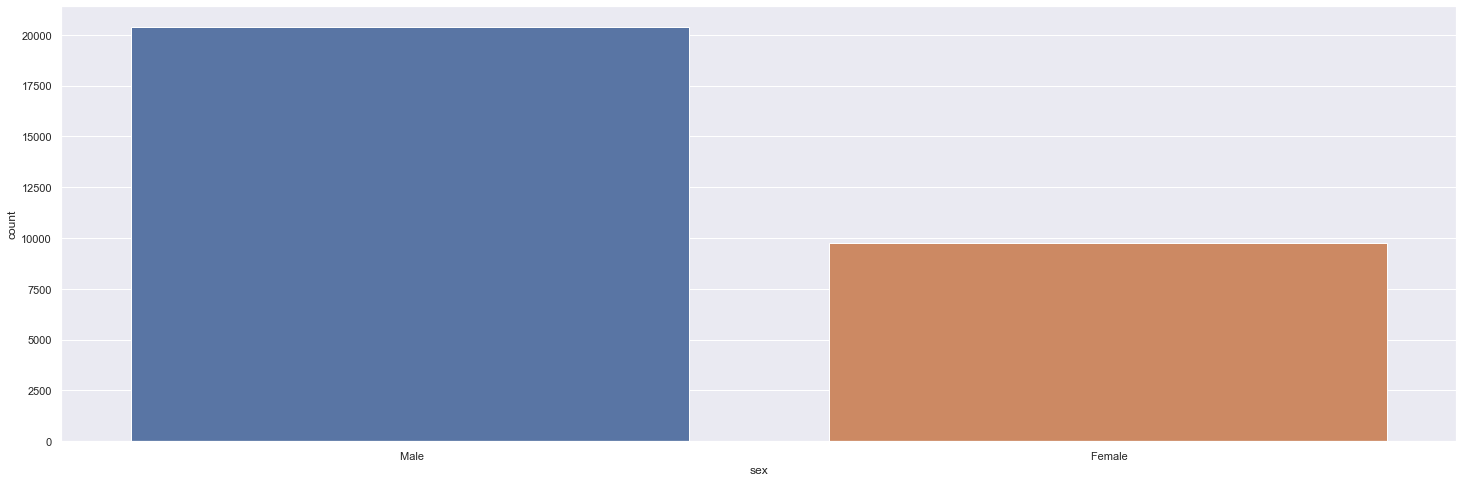

In [37]:
sns.countplot(salary_train['sex'])

##### Data count of male is high

In [98]:
salary_train['native'].value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='native', ylabel='count'>

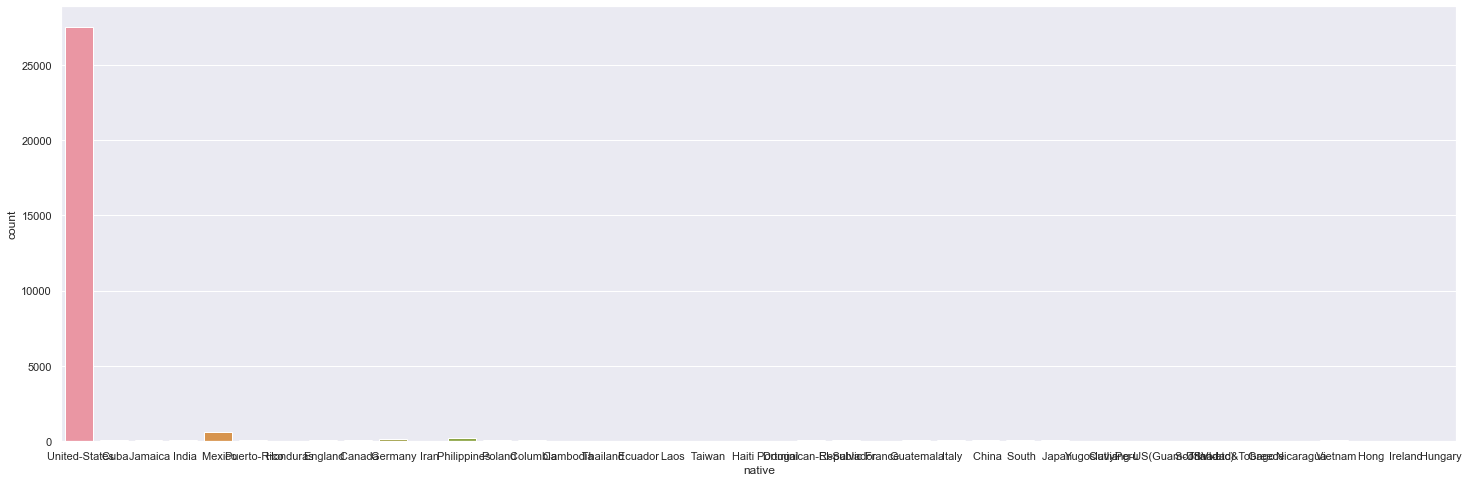

In [38]:
sns.countplot(salary_train['native'])

##### Data count of persons from native US is high

In [106]:
salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Salary', ylabel='count'>

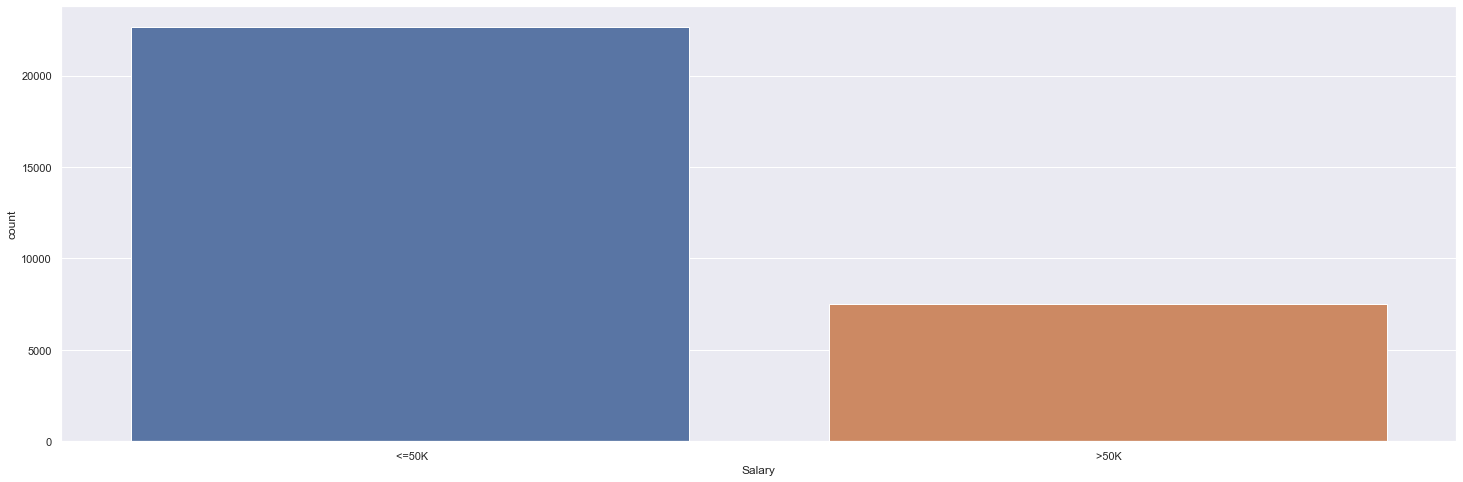

In [107]:
sns.countplot(salary_train['Salary'])

In [108]:
pd.crosstab(salary_train['workclass'],salary_train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,578,365
Local-gov,1458,609
Private,17409,4876
Self-emp-inc,474,600
Self-emp-not-inc,1785,714
State-gov,935,344
Without-pay,14,0


In [109]:
pd.crosstab(salary_train['occupation'],salary_train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


In [39]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [40]:
# find categorical variables

categorical = [var for var in salary_test.columns if salary_test[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [41]:
# view the categorical variables

salary_test[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [42]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [43]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


#### Testing_data

In [44]:
salary_test1=salary_test.copy()

In [45]:
salary_test1[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']]= oe.fit_transform(salary_test1[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']])
salary_test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0,0.0
1,38,2.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0,0.0
2,28,1.0,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0,1.0
3,44,2.0,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0,1.0
4,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2.0,9.0,13,4.0,9.0,3.0,4.0,1.0,0,0,40,37.0,0.0
15056,39,2.0,9.0,13,0.0,9.0,1.0,4.0,0.0,0,0,36,37.0,0.0
15057,38,2.0,9.0,13,2.0,9.0,0.0,4.0,1.0,0,0,50,37.0,0.0
15058,44,2.0,9.0,13,0.0,0.0,3.0,1.0,1.0,5455,0,40,37.0,0.0


In [46]:
salary_test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0,0.0
1,38,2.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0,0.0
2,28,1.0,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0,1.0
3,44,2.0,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0,1.0
4,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2.0,9.0,13,4.0,9.0,3.0,4.0,1.0,0,0,40,37.0,0.0
15056,39,2.0,9.0,13,0.0,9.0,1.0,4.0,0.0,0,0,36,37.0,0.0
15057,38,2.0,9.0,13,2.0,9.0,0.0,4.0,1.0,0,0,50,37.0,0.0
15058,44,2.0,9.0,13,0.0,0.0,3.0,1.0,1.0,5455,0,40,37.0,0.0


### x_test y_test sepration

In [47]:
x_test=salary_test1.iloc[:,0:13]
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0
1,38,2.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0
2,28,1.0,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0
3,44,2.0,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0
4,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2.0,9.0,13,4.0,9.0,3.0,4.0,1.0,0,0,40,37.0
15056,39,2.0,9.0,13,0.0,9.0,1.0,4.0,0.0,0,0,36,37.0
15057,38,2.0,9.0,13,2.0,9.0,0.0,4.0,1.0,0,0,50,37.0
15058,44,2.0,9.0,13,0.0,0.0,3.0,1.0,1.0,5455,0,40,37.0


In [48]:
y_test=salary_test1['Salary']
y_test

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
15055    0.0
15056    0.0
15057    0.0
15058    0.0
15059    1.0
Name: Salary, Length: 15060, dtype: float64

In [49]:
y_test.value_counts()

0.0    11360
1.0     3700
Name: Salary, dtype: int64

#### Training Data

In [50]:
salary_train1=salary_train.copy()

In [51]:
salary_train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [52]:
salary_train1[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']]=oe.fit_transform(salary_train1[['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']])
salary_train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0,0.0
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0,0.0
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0,0.0
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0,0.0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2.0,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,37.0,0.0
30157,40,2.0,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,37.0,1.0
30158,58,2.0,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,37.0,0.0
30159,22,2.0,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,37.0,0.0


### x_train y_train sepration

In [53]:
x_train=salary_train1.iloc[:,0:13]
x_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2.0,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,37.0
30157,40,2.0,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,37.0
30158,58,2.0,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,37.0
30159,22,2.0,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,37.0


In [54]:
y_train=salary_train1['Salary']
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
30156    0.0
30157    1.0
30158    0.0
30159    0.0
30160    1.0
Name: Salary, Length: 30161, dtype: float64

In [55]:
y_train.value_counts()

0.0    22653
1.0     7508
Name: Salary, dtype: int64

### Naive bayes Model Training

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [57]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [58]:
y_pred  =  classifier.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [59]:
y_test

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
15055    0.0
15056    0.0
15057    0.0
15058    0.0
15059    1.0
Name: Salary, Length: 15060, dtype: float64

### Model Testing

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [61]:
cm

array([[10772,   588],
       [ 2446,  1254]], dtype=int64)

In [62]:
ac

0.798539176626826

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88     11360
         1.0       0.68      0.34      0.45      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.64      0.66     15060
weighted avg       0.78      0.80      0.77     15060



#### Accuarcy is not good and data is inbalanced

## Data Balancing

In [67]:
salary_train_data_0 = salary_train1.loc[salary_train1["Salary"]==0.0]
print(salary_train_data_0.shape)

(22653, 14)


In [68]:
salary_train_data_1 = salary_train1.loc[salary_train1["Salary"]==1.0]
print(salary_train_data_1.shape)

(7508, 14)


In [69]:
salary_train_data_0_sample=salary_train_data_0.sample(n=7508,replace=False)
salary_train_data_0_sample.shape

(7508, 14)

In [70]:
data_balance=pd.concat([salary_train_data_0_sample,salary_train_data_1],ignore_index=True)
data_balance = data_balance.sample(n=len(data_balance), replace=False)

In [71]:
data_balance['Salary'].value_counts()

1.0    7508
0.0    7508
Name: Salary, dtype: int64

In [72]:
x_train1=data_balance.iloc[:,0:13]
x_train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
4999,24,1.0,15.0,10,4.0,10.0,4.0,3.0,1.0,1151,0,40,37.0
6685,21,2.0,15.0,10,4.0,2.0,3.0,4.0,1.0,0,0,40,37.0
11333,28,2.0,9.0,13,2.0,11.0,0.0,4.0,1.0,0,0,45,37.0
6352,24,2.0,11.0,9,2.0,5.0,0.0,2.0,1.0,0,0,70,37.0
486,33,0.0,9.0,13,2.0,9.0,0.0,4.0,1.0,0,0,40,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,35,2.0,12.0,14,2.0,3.0,0.0,1.0,1.0,0,0,65,15.0
355,40,2.0,11.0,9,2.0,12.0,0.0,4.0,1.0,0,0,40,37.0
1984,49,2.0,1.0,7,2.0,13.0,0.0,4.0,1.0,0,0,40,37.0
6441,21,2.0,11.0,9,4.0,5.0,3.0,4.0,1.0,0,0,40,37.0


In [73]:
y_train1=data_balance['Salary']
y_train1

4999     0.0
6685     0.0
11333    1.0
6352     0.0
486      0.0
        ... 
11093    1.0
355      0.0
1984     0.0
6441     0.0
13937    1.0
Name: Salary, Length: 15016, dtype: float64

In [74]:
x_train1 = sc.fit_transform(x_train1)
x_train1

array([[-1.30012814, -1.2278556 ,  1.27216926, ..., -0.25635275,
        -0.20995467,  0.25503342],
       [-1.5392024 , -0.21324633,  1.27216926, ..., -0.25635275,
        -0.20995467,  0.25503342],
       [-0.98136246, -0.21324633, -0.4236047 , ..., -0.25635275,
         0.21345109,  0.25503342],
       ...,
       [ 0.69215734, -0.21324633, -2.68463664, ..., -0.25635275,
        -0.20995467,  0.25503342],
       [-1.5392024 , -0.21324633,  0.14165329, ..., -0.25635275,
        -0.20995467,  0.25503342],
       [ 0.45308308, -0.21324633,  1.27216926, ..., -0.25635275,
        -0.20995467,  0.25503342]])

In [75]:
classifier = GaussianNB()
classifier.fit(x_train1, y_train1)

GaussianNB()

In [76]:
y_pred1  =  classifier.predict(x_test)
y_pred1

array([0., 0., 0., ..., 1., 1., 1.])

In [77]:
y_test

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
15055    0.0
15056    0.0
15057    0.0
15058    0.0
15059    1.0
Name: Salary, Length: 15060, dtype: float64

In [78]:
cm = confusion_matrix(y_test, y_pred1)
ac = accuracy_score(y_test,y_pred1)

In [79]:
cm

array([[10036,  1324],
       [ 1619,  2081]], dtype=int64)

In [80]:
ac

0.8045816733067729

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     11360
         1.0       0.61      0.56      0.59      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.72      0.73     15060
weighted avg       0.80      0.80      0.80     15060

